# MOH - Motor de Orientação de Habilidades

O **Motor de Orientação de Habilidades (MOH)** é um sistema projetado para guiar profissionais na aquisição de sequências de habilidades, visando maximizar o valor de carreira e a adaptabilidade em um mercado em constante mudança. O projeto implementa algoritmos avançados de otimização e análise estocástica para lidar com incertezas e restrições complexas.

**Estrutura do Projeto:**
O código principal reside na pasta `src/`:
- `src/decorators.py`: Contém os decorators avançados (`@logger`, `@performance`, `@memoize`).
- `src/grafo.py`: Define a classe `SkillGraph` e os dados das habilidades.
- `src/desafioX.py`: Contém a lógica de cada um dos 5 desafios.
- `src/main.py`: Orquestra a execução e coleta os dados de resultados e visualização.

---

## 1. Configuração e Execução dos Desafios

A célula abaixo configura o ambiente, importa a função principal e executa todos os 5 desafios, retornando um dicionário com os resultados e os dados brutos para visualização.

In [1]:
# Adiciona o diretório 'src' ao path para permitir a importação dos módulos
import sys
import os
import matplotlib.pyplot as plt
from tabulate import tabulate

if 'src' not in sys.path:
    sys.path.append(os.path.abspath('src'))

# Importa a função principal de execução
from main import run_all_challenges

# Executa todos os desafios e armazena os resultados
results = run_all_challenges()

if results:
    print("Execução dos desafios concluída com sucesso.")
    # Exibe os resultados do Desafio 1 (Exemplo)
    d1 = results['d1']['stochastic_solution']
    print("\n--- RESULTADOS DO DESAFIO 1 ---")
    print(f"Melhor Caminho: {' → '.join(d1['path'])}")
    print(f"Valor Esperado (E[V]): {d1['expected_value']:.2f}")
    print(f"Desvio-Padrão (σ): {d1['std_deviation']:.2f}")
else:
    print("Execução falhou devido a erros de validação do grafo.")

2025-11-21 22:27:38,818 - INFO -  INICIANDO: _initialize_skills
2025-11-21 22:27:38,820 - INFO -    Parâmetros posicionais: (<grafo.SkillGraph object at 0x0000017650DCE120>,)
2025-11-21 22:27:38,821 - INFO -  INICIANDO: add_skill
2025-11-21 22:27:38,822 - INFO -    Parâmetros posicionais: (<grafo.SkillGraph object at 0x0000017650DCE120>, 'S1', 'Programação Básica (Python)', 80, 3, 4, [],...
2025-11-21 22:27:38,823 - INFO -  SUCESSO: add_skill concluída
2025-11-21 22:27:38,824 - INFO -  INICIANDO: add_skill
2025-11-21 22:27:38,825 - INFO -    Parâmetros posicionais: (<grafo.SkillGraph object at 0x0000017650DCE120>, 'S2', 'Modelagem de Dados (SQL)', 60, 4, 3, [], 'B...
2025-11-21 22:27:38,825 - INFO -  SUCESSO: add_skill concluída
2025-11-21 22:27:38,826 - INFO -  INICIANDO: add_skill
2025-11-21 22:27:38,827 - INFO -    Parâmetros posicionais: (<grafo.SkillGraph object at 0x0000017650DCE120>, 'S3', 'Algoritmos Avançados', 100, 7, 8, ['S1'], '...
2025-11-21 22:27:38,828 - INFO -  SUCESSO:

 validate_graph -> Tempo: 8.99 ms | Memória: 11.38 KB
 desafio1_max_value_path -> Tempo: 161.35 ms | Memória: 72.42 KB
 validate_graph -> Tempo: 9.60 ms | Memória: 14.46 KB
 desafio2_critical_skills_analysis -> Tempo: 22.93 ms | Memória: 0.00 KB


2025-11-21 22:27:39,137 - INFO -  SUCESSO: greedy_selection concluída
2025-11-21 22:27:39,140 - INFO -  PERFORMANCE - optimal_exhaustive_search: 0.16 ms | 13.45 KB
2025-11-21 22:27:39,141 - INFO -  SUCESSO: desafio3_fast_pivot concluída
2025-11-21 22:27:39,142 - INFO -  PERFORMANCE - desafio3_fast_pivot: 18.30 ms | 0.00 KB
2025-11-21 22:27:39,144 - INFO -  INICIANDO: desafio4_parallel_tracks
2025-11-21 22:27:39,146 - INFO -    Parâmetros posicionais: (<grafo.SkillGraph object at 0x0000017650D83750>,)
2025-11-21 22:27:39,179 - INFO -  SUCESSO: desafio4_parallel_tracks concluída
2025-11-21 22:27:39,183 - INFO -  PERFORMANCE - desafio4_parallel_tracks: 38.77 ms | 265.40 KB
2025-11-21 22:27:39,184 - INFO -  INICIANDO: desafio5_skill_recommendation
2025-11-21 22:27:39,186 - INFO -    Parâmetros posicionais: (<grafo.SkillGraph object at 0x0000017650D83750>,)
2025-11-21 22:27:39,187 - INFO -    Parâmetros nomeados: {'current_skills': []}
2025-11-21 22:27:39,189 - INFO -  INICIANDO: get_market

 optimal_exhaustive_search -> Tempo: 0.16 ms | Memória: 13.45 KB
 desafio3_fast_pivot -> Tempo: 18.30 ms | Memória: 0.00 KB
 desafio4_parallel_tracks -> Tempo: 38.77 ms | Memória: 265.40 KB
 desafio5_skill_recommendation -> Tempo: 34.86 ms | Memória: 15.33 KB
Execução dos desafios concluída com sucesso.

--- RESULTADOS DO DESAFIO 1 ---
Melhor Caminho: S1 → S4 → S6
Valor Esperado (E[V]): 20.98
Desvio-Padrão (σ): 0.76


## 2. Visualização dos Resultados (Tabelas e Gráficos)

Esta seção utiliza os dados brutos retornados pela função `run_all_challenges()` para gerar as tabelas e gráficos solicitados, exibindo-os diretamente no output do notebook.

### 2.1. Tabela 1: Comparação das 3 Melhores Ordens de Habilidades Críticas (Desafio 2)

In [2]:
if results and 'viz' in results:
    top3 = results['viz']['top3_table']
    print(tabulate(top3['data'], headers=top3['headers'], tablefmt='pipe'))
    print("\n" + top3['analysis'])

|   Posição | Ordem                  | Custo Total   |
|----------:|:-----------------------|:--------------|
|         1 | S5 → S7 → S8 → S3 → S9 | 1060h         |
|         2 | S5 → S7 → S3 → S8 → S9 | 1070h         |
|         3 | S5 → S7 → S8 → S9 → S3 | 1070h         |

**Análise:** O custo médio de todas as 120 permutações é de 1230.00h, com um desvio-padrão de 87.75h. A melhor ordem (S5 → S7 → S8 → S3 → S9) minimiza o tempo acumulado.


### 2.2. Tabela 2: Contraexemplo - Falha da Heurística Gulosa (Desafio 3)

In [3]:
if results and 'viz' in results:
    ce = results['viz']['counterexample_table']
    analysis = ce['analysis']
    
    print(tabulate(ce['data'], headers=ce['headers'], tablefmt='pipe'))
    
    print(f"\n**Adaptabilidade Mínima Requerida:** {analysis['min_adaptability']}")
    print("\n**Solução Gulosa:**")
    print(f"- Ordem: {' → '.join(analysis['greedy_path']['order'])}")
    print(f"- Tempo Total: {analysis['greedy_path']['time']}h")
    print(f"- Explicação: {analysis['greedy_path']['explanation']}")
    
    print("\n**Solução Ótima:**")
    print(f"- Ordem: {' + '.join(analysis['optimal_path']['order'])}")
    print(f"- Tempo Total: {analysis['optimal_path']['time']}h")
    print(f"- Explicação: {analysis['optimal_path']['explanation']}")

| Habilidade   |   Valor |   Tempo (h) |   Razão V/T |
|:-------------|--------:|------------:|------------:|
| H_A          |       8 |          10 |         0.8 |
| H_B          |       5 |           5 |         1   |
| H_C          |       4 |           4 |         1   |

**Adaptabilidade Mínima Requerida:** 12

**Solução Gulosa:**
- Ordem: H_B → H_C → H_A
- Tempo Total: 19h
- Explicação: O guloso prioriza H_B e H_C (maior V/T), mas precisa de H_A para atingir o mínimo, resultando em um tempo total de 19h.

**Solução Ótima:**
- Ordem: H_A + H_C
- Tempo Total: 14h
- Explicação: A solução ótima (H_A + H_C) atinge o mínimo de adaptabilidade (12) com o menor tempo total (14h), provando que a heurística gulosa falha neste caso.


### 2.3. Tabela 3: Modelagem Probabilística de Transição de Mercado (Desafio 5)

In [4]:
if results and 'viz' in results:
    prob = results['viz']['probabilities_table']
    print(prob['description'] + "\n")
    print(tabulate(prob['data'], headers=prob['headers'], tablefmt='pipe'))

As probabilidades abaixo são utilizadas no algoritmo de Programação Dinâmica com look-ahead (Desafio 5) para simular a incerteza do mercado e ajustar o valor esperado das habilidades ao longo do tempo.

| Período   |   Prob ML↑ |   Prob Nuvem↑ |   Prob BI↑ |   Prob Azure↓ |
|:----------|-----------:|--------------:|-----------:|--------------:|
| Ano 1     |       0.35 |          0.25 |       0.2  |          0.1  |
| Ano 2     |       0.4  |          0.3  |       0.15 |          0.05 |


### 2.4. Gráfico de Performance do Sistema (Tempo de Execução)

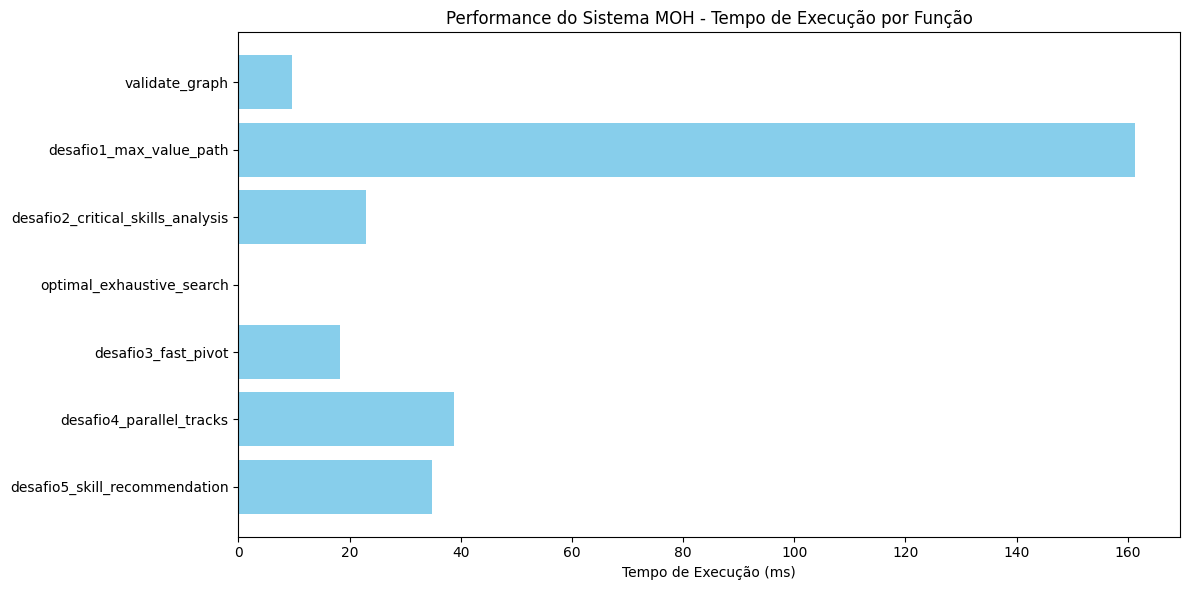

In [5]:
if results and 'viz' in results:
    perf = results['viz']['performance_chart']
    
    plt.figure(figsize=(12, 6))
    plt.barh(perf['functions'], perf['times'], color='skyblue')
    plt.xlabel('Tempo de Execução (ms)')
    plt.title(perf['title'])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

### 2.5. Gráfico de Benchmark de Algoritmos de Ordenação (Desafio 4)

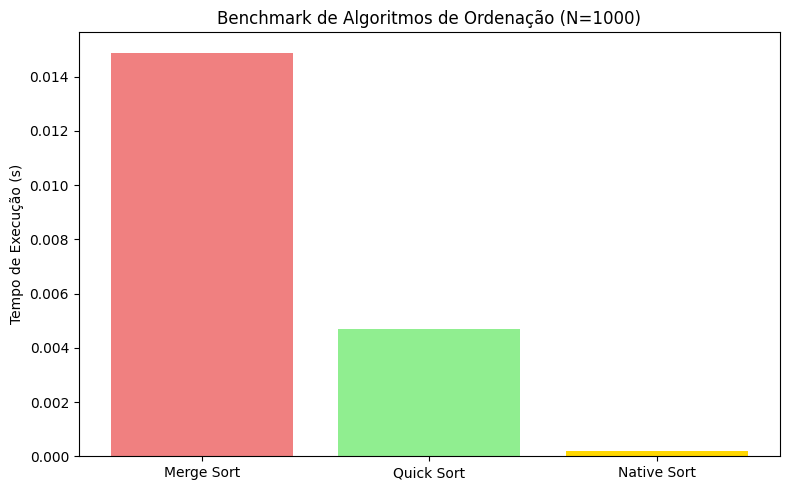

In [6]:
if results and 'viz' in results:
    bench = results['viz']['benchmark_chart']
    
    plt.figure(figsize=(8, 5))
    plt.bar(bench['labels'], bench['times'], color=['lightcoral', 'lightgreen', 'gold'])
    plt.ylabel('Tempo de Execução (s)')
    plt.title(bench['title'])
    plt.tight_layout()
    plt.show()

## 3. Análise de Complexidade (Big-O) e Justificativa

A complexidade de tempo dos algoritmos é um fator crucial para garantir a escalabilidade e a eficiência do Motor de Orientação de Habilidades (MOH). A seguir, apresentamos a análise de complexidade para os principais desafios implementados.

| Desafio | Algoritmo Principal | Complexidade de Tempo (Big-O) | Justificativa |
| :--- | :--- | :--- | :--- |
| **D1** | Caminho de Maior Valor (Busca em Grafo com Monte Carlo) | $O(V + E + P \cdot S)$ | Onde $V$ é o número de habilidades, $E$ é o número de pré-requisitos, $P$ é o número de caminhos viáveis e $S$ é o número de cenários de Monte Carlo. A busca em grafo (DFS) é $O(V+E)$. O cálculo do valor para cada caminho $P$ envolve $S$ iterações de Monte Carlo. |
| **D2** | Análise de Habilidades Críticas (Permutações) | $O(k! \cdot k)$ | Onde $k$ é o número de habilidades críticas (neste caso, $k=5$). O algoritmo enumera todas as $k!$ permutações e, para cada uma, calcula o custo em $O(k)$. Para $k=5$, $5! = 120$, o que é perfeitamente viável. |
| **D3** | Pivô Mais Rápido (Busca Exaustiva) | $O(2^n \cdot n)$ | Onde $n$ é o número de habilidades básicas. O algoritmo gera $2^n$ subconjuntos e, para cada um, calcula o tempo e a adaptabilidade em $O(n)$. Para $n=4$ (S1, S2, H10, H12), $2^4 = 16$ subconjuntos, o que é muito rápido. |
| **D4** | Trilhas Paralelas (Algoritmos de Ordenação) | $O(N \log N)$ | Onde $N$ é o tamanho da lista de benchmark (1000 elementos). Tanto o Merge Sort quanto o Quick Sort (caso médio) e o Timsort (nativo do Python) possuem complexidade $O(N \log N)$, que é a complexidade ideal para algoritmos de ordenação baseados em comparação. |

**Observação sobre a Complexidade do D1:**
A complexidade $O(V + E + P \cdot S)$ do Desafio 1 é dominada pelo termo $P \cdot S$ se o número de caminhos viáveis ($P$) for grande. No entanto, em um grafo de habilidades com restrições de tempo e complexidade, $P$ tende a ser pequeno. A memoização (`@memoize`) na função `monte_carlo_simulation` garante que o custo $O(S)$ seja pago apenas uma vez por conjunto único de habilidades.

**Observação sobre a Complexidade do D3:**
A busca exaustiva $O(2^n)$ é aceitável para o Desafio 3 porque o número de habilidades básicas ($n$) é muito pequeno (4 habilidades no grafo atual). Se o número de habilidades básicas aumentasse significativamente, seria necessário adotar uma heurística gulosa ou um algoritmo de Programação Dinâmica para o problema da Mochila (Knapsack Problem).